In [1]:
import cv2
import pandas as pd
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model, load_model
import matplotlib.pyplot as plt


In [2]:
emotion_model = load_model('fer2013_mini_XCEPTION.102-0.66.hdf5')


In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


# ANALYZING THE 5 RECENT VIDEOS OF ZACH KING AND THEN COMPARE THEM WITH THE SURVEY RESULTS

### ANALYZING THE 5 RECENT VIDEOS OF ZACH KING IN APRIL 2023

#### First video: When the day needs me anywhere and everywhere, #CeraVe SPF is what I wear so I can #FaceItLikeADerm   #CeraVePartner.mp4

In [60]:
video_file = cv2.VideoCapture('When the day needs me anywhere and everywhere, #CeraVe SPF is what I wear so I can #FaceItLikeADerm   #CeraVePartner.mp4')


In [61]:
df = pd.DataFrame(columns=['Frame', 'Emotion'])


In [ ]:
# Analyze emotions for each frame of the video
frame_number = 0
while True:
    ret, frame = video_file.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for i, (x, y, w, h) in enumerate(faces):
        face = frame[y:y+h, x:x+w]

        face = cv2.resize(face, (64, 64))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        face = np.expand_dims(face, axis=2)
        face = np.expand_dims(face, axis=0)
        face = face / 255.0

        emotion_scores = emotion_model.predict(face)[0]
        emotion_index = np.argmax(emotion_scores)
        emotion = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][emotion_index]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        df.loc[len(df)] = [frame_number, emotion]

    frame_number += 1

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


In [63]:
# Release the video file and destroy the windows
video_file.release()
cv2.destroyAllWindows()


In [64]:
emotion_counts = df.groupby('Emotion')['Frame'].count().reset_index()



In [65]:
emotion_counts = emotion_counts.rename(columns={'Frame': 'Frame Count'})



In [66]:
df = df.drop('Frame', axis=1)



In [67]:
df = pd.merge(df, emotion_counts, on='Emotion')

In [68]:
df_grouped = df.groupby('Emotion').count()


In [69]:
df_grouped = df_grouped.rename(columns={'Frame': 'Frame Count'})


In [70]:
# Reset the index to make 'Emotion' a column again
df_grouped = df_grouped.reset_index()



In [71]:
print(df_grouped)

    Emotion  Frame Count
0     Angry           67
1   Disgust            1
2      Fear           17
3     Happy          205
4   Neutral           99
5       Sad           46
6  Surprise            2


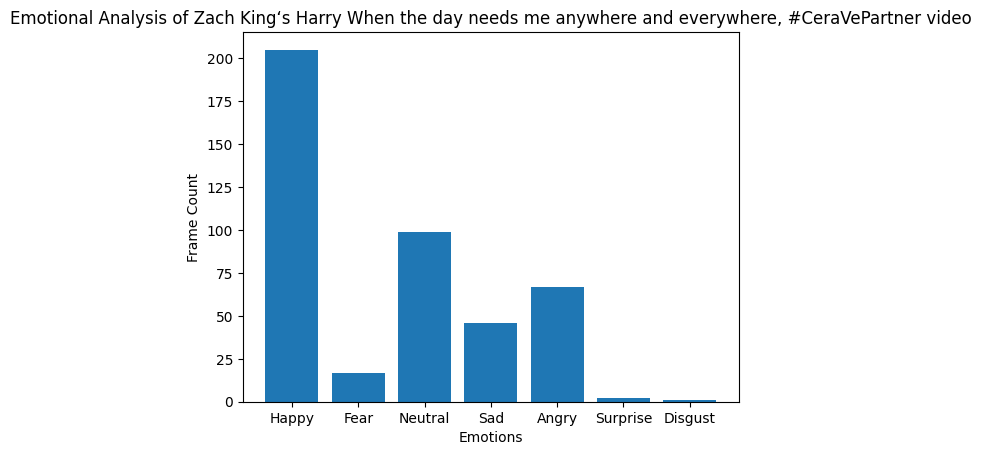

In [72]:
plt.bar(df['Emotion'], df['Frame Count'])

plt.title('Emotional Analysis of Zach King‘s Harry When the day needs me anywhere and everywhere, #CeraVePartner video')
plt.xlabel('Emotions')
plt.ylabel('Frame Count')

plt.show()

#### previous model results for the above video

In [15]:
print(df_grouped)

    Emotion  Frame Count
0     Angry           66
1   Disgust            1
2      Fear           17
3     Happy          205
4   Neutral          100
5       Sad           46
6  Surprise            2


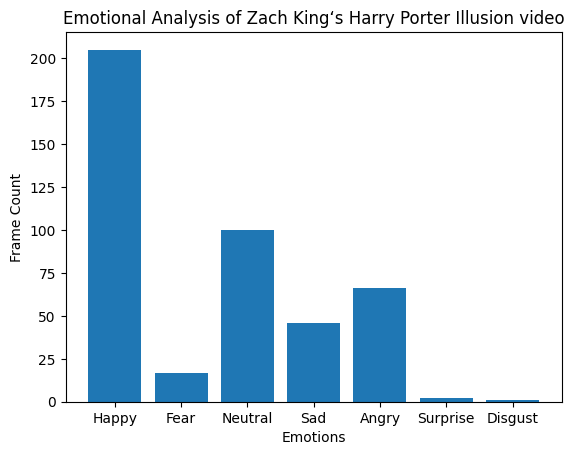

In [16]:
plt.bar(df['Emotion'], df['Frame Count'])

plt.title('Emotional Analysis of Zach King‘s Harry When the day needs me anywhere and everywhere, #CeraVePartner video')
plt.xlabel('Emotions')
plt.ylabel('Frame Count')

plt.show()

#### Second video: This is Puzzling 🧩.mp4

In [19]:
video_file = cv2.VideoCapture('This is Puzzling.mp4')


In [20]:
df = pd.DataFrame(columns=['Frame', 'Emotion'])


In [ ]:
# Analyze emotions for each frame of the video
frame_number = 0
while True:
    ret, frame = video_file.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for i, (x, y, w, h) in enumerate(faces):
        face = frame[y:y+h, x:x+w]

        face = cv2.resize(face, (64, 64))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        face = np.expand_dims(face, axis=2)
        face = np.expand_dims(face, axis=0)
        face = face / 255.0

        emotion_scores = emotion_model.predict(face)[0]
        emotion_index = np.argmax(emotion_scores)
        emotion = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][emotion_index]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        df.loc[len(df)] = [frame_number, emotion]

    frame_number += 1

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


In [22]:
# Release the video file and destroy the windows
video_file.release()
cv2.destroyAllWindows()


In [23]:
emotion_counts = df.groupby('Emotion')['Frame'].count().reset_index()
emotion_counts = emotion_counts.rename(columns={'Frame': 'Frame Count'})


In [24]:
df = df.drop('Frame', axis=1)
df = pd.merge(df, emotion_counts, on='Emotion')



In [25]:
df_grouped = df.groupby('Emotion').count()
df_grouped = df_grouped.rename(columns={'Frame': 'Frame Count'})
# Reset the index to make 'Emotion' a column again
df_grouped = df_grouped.reset_index()
print(df_grouped)

    Emotion  Frame Count
0     Angry           17
1   Disgust            5
2      Fear           30
3     Happy           70
4   Neutral          134
5       Sad           34
6  Surprise           45


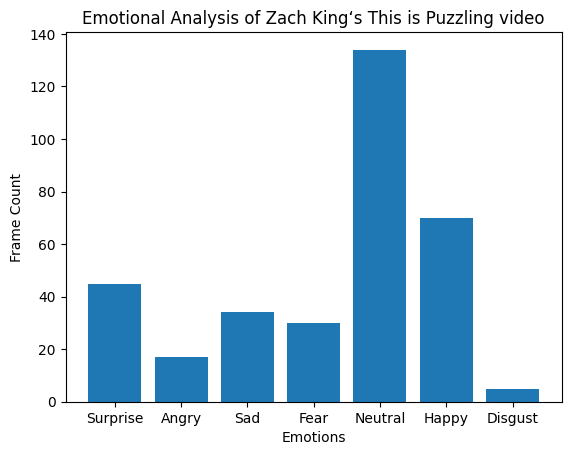

In [27]:
plt.bar(df['Emotion'], df['Frame Count'])

plt.title('Emotional Analysis of Zach King‘s This is Puzzling video')
plt.xlabel('Emotions')
plt.ylabel('Frame Count')

plt.show()

#### Third video: Life isnt always as it seems @sofyank96

In [28]:
video_file = cv2.VideoCapture('Life isnt always as it seems.mp4')


In [29]:
df = pd.DataFrame(columns=['Frame', 'Emotion'])


In [ ]:
# Analyze emotions for each frame of the video
frame_number = 0
while True:
    ret, frame = video_file.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for i, (x, y, w, h) in enumerate(faces):
        face = frame[y:y+h, x:x+w]

        face = cv2.resize(face, (64, 64))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        face = np.expand_dims(face, axis=2)
        face = np.expand_dims(face, axis=0)
        face = face / 255.0

        emotion_scores = emotion_model.predict(face)[0]
        emotion_index = np.argmax(emotion_scores)
        emotion = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][emotion_index]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        df.loc[len(df)] = [frame_number, emotion]

    frame_number += 1

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


In [31]:
# Release the video file and destroy the windows
video_file.release()
cv2.destroyAllWindows()


In [32]:
emotion_counts = df.groupby('Emotion')['Frame'].count().reset_index()
emotion_counts = emotion_counts.rename(columns={'Frame': 'Frame Count'})


In [33]:
df = df.drop('Frame', axis=1)
df = pd.merge(df, emotion_counts, on='Emotion')



In [34]:
df_grouped = df.groupby('Emotion').count()
df_grouped = df_grouped.rename(columns={'Frame': 'Frame Count'})
# Reset the index to make 'Emotion' a column again
df_grouped = df_grouped.reset_index()
print(df_grouped)

    Emotion  Frame Count
0     Angry           26
1      Fear           39
2     Happy          231
3   Neutral          230
4       Sad           55
5  Surprise            1


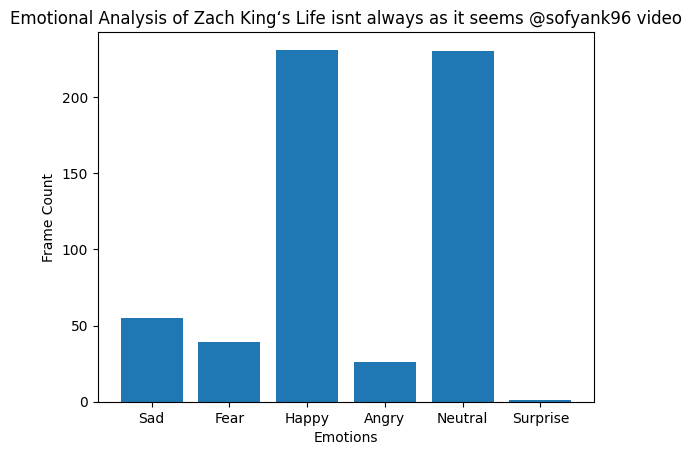

In [35]:
plt.bar(df['Emotion'], df['Frame Count'])

plt.title('Emotional Analysis of Zach King‘s Life isnt always as it seems @sofyank96 video')
plt.xlabel('Emotions')
plt.ylabel('Frame Count')

plt.show()

#### Fourth video: No Description

In [36]:
video_file = cv2.VideoCapture('null.mp4')


In [37]:
df = pd.DataFrame(columns=['Frame', 'Emotion'])


In [ ]:
# Analyze emotions for each frame of the video
frame_number = 0
while True:
    ret, frame = video_file.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for i, (x, y, w, h) in enumerate(faces):
        face = frame[y:y+h, x:x+w]

        face = cv2.resize(face, (64, 64))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        face = np.expand_dims(face, axis=2)
        face = np.expand_dims(face, axis=0)
        face = face / 255.0

        emotion_scores = emotion_model.predict(face)[0]
        emotion_index = np.argmax(emotion_scores)
        emotion = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][emotion_index]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        df.loc[len(df)] = [frame_number, emotion]

    frame_number += 1

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


In [39]:
# Release the video file and destroy the windows
video_file.release()
cv2.destroyAllWindows()


In [40]:
emotion_counts = df.groupby('Emotion')['Frame'].count().reset_index()
emotion_counts = emotion_counts.rename(columns={'Frame': 'Frame Count'})


In [41]:
df = df.drop('Frame', axis=1)
df = pd.merge(df, emotion_counts, on='Emotion')



In [42]:
df_grouped = df.groupby('Emotion').count()
df_grouped = df_grouped.rename(columns={'Frame': 'Frame Count'})
# Reset the index to make 'Emotion' a column again
df_grouped = df_grouped.reset_index()
print(df_grouped)

   Emotion  Frame Count
0    Angry            7
1     Fear            6
2    Happy           33
3  Neutral           90
4      Sad           13


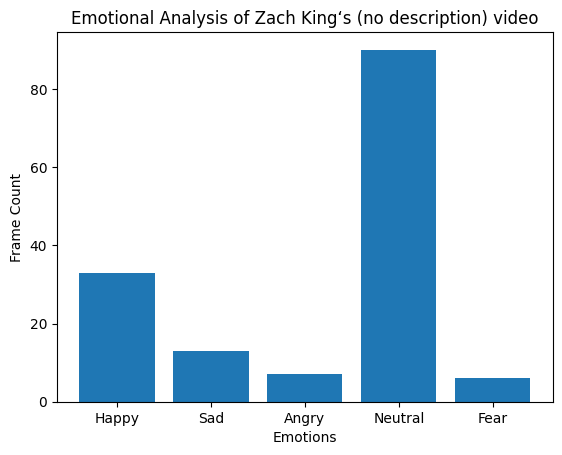

In [43]:
plt.bar(df['Emotion'], df['Frame Count'])

plt.title('Emotional Analysis of Zach King‘s (no description) video')
plt.xlabel('Emotions')
plt.ylabel('Frame Count')

plt.show()

#### Fifth video: Can someone please explain how the mirror knows there is an egg

In [44]:
video_file = cv2.VideoCapture('Can someone please explain how the mirror knows there is an egg.mp4')


In [45]:
df = pd.DataFrame(columns=['Frame', 'Emotion'])


In [ ]:
# Analyze emotions for each frame of the video
frame_number = 0
while True:
    ret, frame = video_file.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for i, (x, y, w, h) in enumerate(faces):
        face = frame[y:y+h, x:x+w]

        face = cv2.resize(face, (64, 64))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        face = np.expand_dims(face, axis=2)
        face = np.expand_dims(face, axis=0)
        face = face / 255.0

        emotion_scores = emotion_model.predict(face)[0]
        emotion_index = np.argmax(emotion_scores)
        emotion = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][emotion_index]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        df.loc[len(df)] = [frame_number, emotion]

    frame_number += 1

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


In [47]:
# Release the video file and destroy the windows
video_file.release()
cv2.destroyAllWindows()


In [48]:
emotion_counts = df.groupby('Emotion')['Frame'].count().reset_index()
emotion_counts = emotion_counts.rename(columns={'Frame': 'Frame Count'})


In [49]:
df = df.drop('Frame', axis=1)
df = pd.merge(df, emotion_counts, on='Emotion')



In [50]:
df_grouped = df.groupby('Emotion').count()
df_grouped = df_grouped.rename(columns={'Frame': 'Frame Count'})
# Reset the index to make 'Emotion' a column again
df_grouped = df_grouped.reset_index()
print(df_grouped)

    Emotion  Frame Count
0     Angry            3
1   Disgust            2
2      Fear           63
3     Happy           85
4   Neutral           42
5       Sad           86
6  Surprise            6


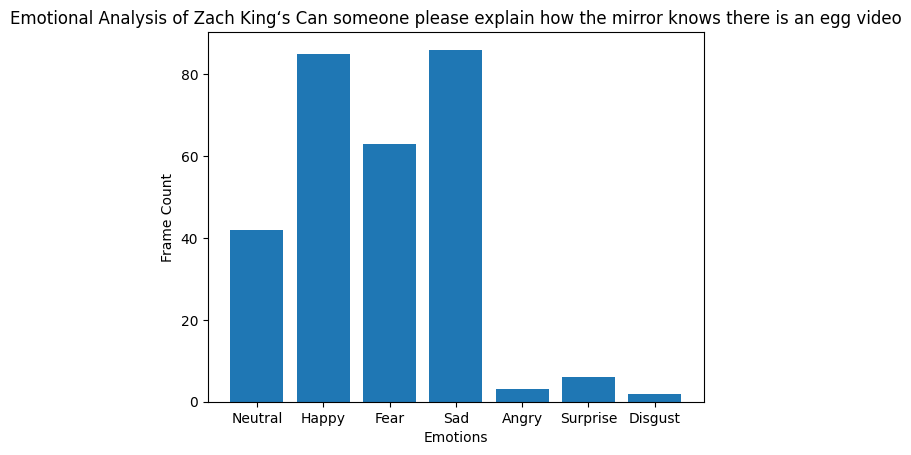

In [51]:
plt.bar(df['Emotion'], df['Frame Count'])

plt.title('Emotional Analysis of Zach King‘s Can someone please explain how the mirror knows there is an egg video')
plt.xlabel('Emotions')
plt.ylabel('Frame Count')

plt.show()

#### Sixth video: spent the last 6 months making this, hope you enjoy the trailer. Watch the entire short film in my profile

In [52]:
video_file = cv2.VideoCapture('spent the last 6 months making this, hope you enjoy the trailer. Watch the entire short film in my profile.mp4')


In [53]:
df = pd.DataFrame(columns=['Frame', 'Emotion'])


In [ ]:
# Analyze emotions for each frame of the video
frame_number = 0
while True:
    ret, frame = video_file.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for i, (x, y, w, h) in enumerate(faces):
        face = frame[y:y+h, x:x+w]

        face = cv2.resize(face, (64, 64))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        face = np.expand_dims(face, axis=2)
        face = np.expand_dims(face, axis=0)
        face = face / 255.0

        emotion_scores = emotion_model.predict(face)[0]
        emotion_index = np.argmax(emotion_scores)
        emotion = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][emotion_index]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        df.loc[len(df)] = [frame_number, emotion]

    frame_number += 1

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


In [55]:
# Release the video file and destroy the windows
video_file.release()
cv2.destroyAllWindows()


In [56]:
emotion_counts = df.groupby('Emotion')['Frame'].count().reset_index()
emotion_counts = emotion_counts.rename(columns={'Frame': 'Frame Count'})


In [57]:
df = df.drop('Frame', axis=1)
df = pd.merge(df, emotion_counts, on='Emotion')



In [58]:
df_grouped = df.groupby('Emotion').count()
df_grouped = df_grouped.rename(columns={'Frame': 'Frame Count'})
# Reset the index to make 'Emotion' a column again
df_grouped = df_grouped.reset_index()
print(df_grouped)

    Emotion  Frame Count
0     Angry           21
1      Fear           32
2     Happy           15
3   Neutral           44
4       Sad           15
5  Surprise            1


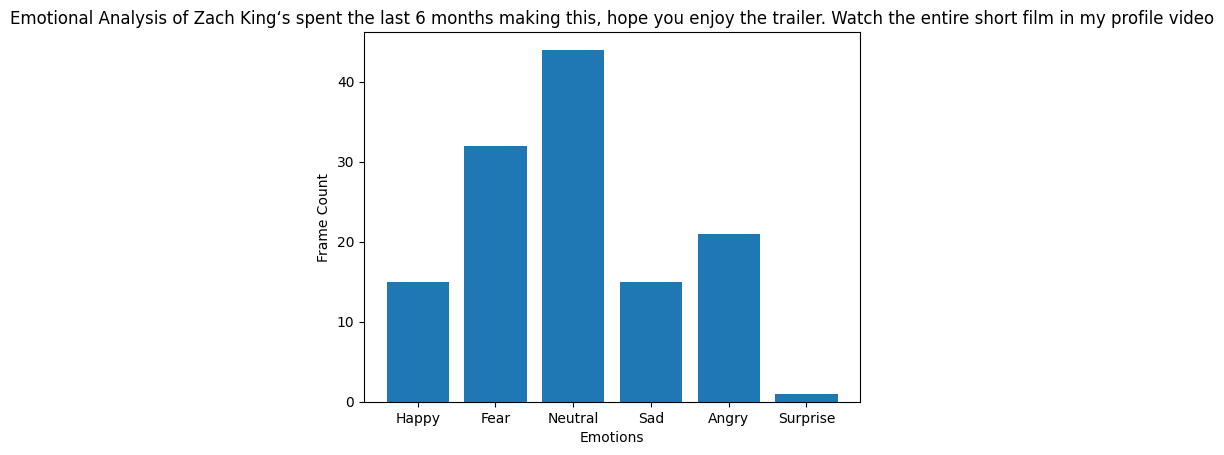

In [59]:
plt.bar(df['Emotion'], df['Frame Count'])

plt.title('Emotional Analysis of Zach King‘s spent the last 6 months making this, hope you enjoy the trailer. Watch the entire short film in my profile video')
plt.xlabel('Emotions')
plt.ylabel('Frame Count')

plt.show()